# Data prep

## Imports and loads

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

splits = {'train': 'train.json', 'validation': 'valid.json', 'test': 'test.json'}
trainDf = pd.read_json("hf://datasets/LangAGI-Lab/pearl/" + splits["train"])
validationDf = pd.read_json("hf://datasets/LangAGI-Lab/pearl/" + splits["validation"])
testDf = pd.read_json("hf://datasets/LangAGI-Lab/pearl/" + splits["test"])

# trainDf

In [ ]:
trainDf

,data_id,user_persona,seen_movie_titles,gt_abstract,gt_movie_title,gt_genre,gt_director,gt_cast,dialogue
0,3433,"[Like] Lots of action, suspense, and a brillia...","[Creature from the Black Lagoon (1954), Noise ...",Title: House of Sand and Fog (2003)\nGenre: Cr...,House of Sand and Fog (2003),"Crime, Drama",Vadim Perelman,"Jennifer Connelly, Ben Kingsley, Ron Eldard",[Seeker: Hi there! I'm in the mood to watch a ...
1,69656,"[Like]\n- The action sequences are stylish, co...","[John Wick: Chapter 2 (2017), Ad Astra (2019),...",Title: The Disaster Artist (2017)\nGenre: Biog...,The Disaster Artist (2017),"Biography, Comedy, Drama",James Franco,"Dave Franco, James Franco, Seth Rogen",[Seeker: Hi there! I'm in the mood to watch a ...
2,23200,[Like] The movie presents a thought-provoking ...,"[Battle in Seattle (2008), The Cove (2009), Ha...",Title: The Brothers Bloom (2009)\nGenre: Actio...,The Brothers Bloom (2009),"Action, Adventure, Comedy, Crime, Drama, Romance",Rian Johnson,"Rachel Weisz, Adrien Brody, Mark Ruffalo",[Seeker: Hi there! I'm in the mood to watch a ...
3,20593,[Like]\n- Well done and one of Huston's best f...,"[The Asphalt Jungle (1950), What Happened Was....","Title: World War Z (2013)\nGenre: Action, Adve...",World War Z (2013),"Action, Adventure, Horror, Sci-Fi",Marc Forster,"Brad Pitt, Mireille Enos, Daniella Kertesz",[Seeker: Hi there! I'm in the mood to watch a ...
4,70422,[Like]\n- Elijah Wood's performance as Norval\...,"[Come to Daddy (2020), Baby Driver (2017), De...","Title: Uncut Gems (2019)\nGenre: Crime, Drama,...",Uncut Gems (2019),"Crime, Drama, Thriller","Benny Safdie, Josh Safdie","Mesfin Lamengo, Sun Zhi Hua-Hilton, Liang Wei-...",[Seeker: Hi there! I'm in the mood to watch a ...
...,...,...,...,...,...,...,...,...,...
49995,51962,[Like]\n- Beautiful cinematography\n- Strong a...,"[Population 436 (2006), John Q (2002), Star Tr...",Title: Boy A (2007)\nGenre: Drama\nDirector: J...,Boy A (2007),Drama,John Crowley,"Andrew Garfield, Peter Mullan, Siobhan Finneran",[Seeker: Hi there! I'm in the mood to watch a ...
49996,12273,"[Like] - Some good parts, average thriller wit...","[Daniel Isn't Real (2019), The Rover (2014), ...",Title: An American Werewolf in London (1981)\n...,An American Werewolf in London (1981),"Comedy, Horror",John Landis,"Joe Belcher, David Naughton, Griffin Dunne",[Seeker: Hi there! I'm in the mood to watch a ...
49997,21348,[Like] The allegorical nature of the movie and...,"[Alien: Covenant (2017), Terrifier (2018), Fra...","Title: Breathless (1960)\nGenre: Crime, Drama...",Breathless (1960),"Crime, Drama",Jean-Luc Godard,"Jean Seberg, Jean-Paul Belmondo, Van Doude",[Seeker: Hi there! I'm in the mood to watch a ...
49998,23101,[Like]\n- The movie is a relevant and alert ob...,"[Up in the Air (2009), Closer (2004), Rush (1...",Title: 9 to 5 (1980)\nGenre: Comedy\nDirector:...,9 to 5 (1980),Comedy,Colin Higgins,"Jane Fonda, Lily Tomlin, Dolly Parton",[Seeker: Hi there! I'm in the mood to watch a ...


In [ ]:
trainDf.isnull().sum()


,0
data_id,0
user_persona,0
seen_movie_titles,0
gt_abstract,0
gt_movie_title,0
gt_genre,0
gt_director,0
gt_cast,0
dialogue,0


### Movie (i.e. Seen movies)

In [ ]:
all_movies = [movie for sublist in trainDf['seen_movie_titles'] for movie in sublist]

movie_counts = Counter(all_movies)
num_unique_movies = len(movie_counts)

print(f"Total unique movies: {num_unique_movies}")
movie_df = pd.DataFrame(movie_counts.items(), columns=['movie_title', 'count'])
movie_df = movie_df.sort_values(by='count', ascending=False).reset_index(drop=True)

Total unique movies: 9393


In [ ]:
movie_df

,movie_title,count
0,Baby Driver (2017),292
1,The Incredibles (2004),282
2,The Great Gatsby (2013),241
3,Eternal Sunshine of the Spotless Mind (2004),194
4,Iron Man (2008),175
...,...,...
9388,Drums in the Deep South (1951),1
9389,Middle Men (2010),1
9390,Marion Bridge (2003),1
9391,On Any Sunday (1971),1


In [ ]:
percentiles_list = [.2, .4, .6, .8]
movie_df.describe(percentiles=percentiles_list)

,count
count,9393.000000
mean,15.969339
std,21.580233
min,1.000000
20%,3.000000
40%,6.000000
50%,8.000000
60%,11.000000
80%,24.000000
max,292.000000


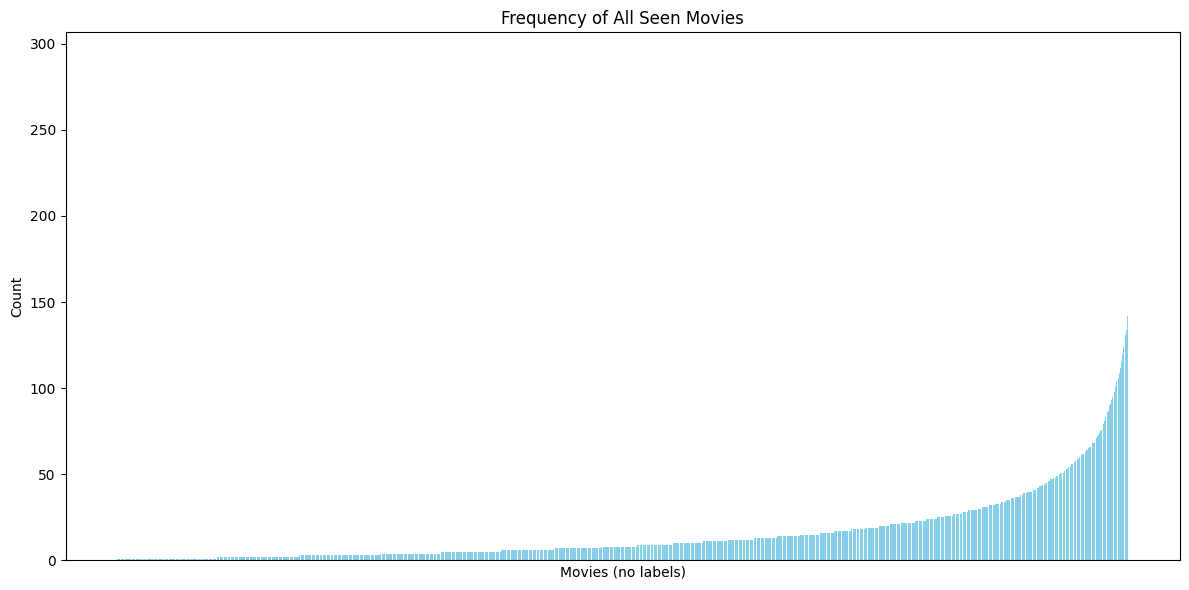

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(movie_df)), movie_df['count'], color='skyblue')
plt.xlabel('Movies (no labels)')
plt.ylabel('Count')
plt.title('Frequency of All Seen Movies')
plt.xticks([])
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

### Movie Titles (i.e. Recommended movie)

In [ ]:
all_movie_titles = [movie_title for movie_title in trainDf['gt_movie_title'] ]
movie_title_counts = Counter(all_movie_titles)
movie_title_df = pd.DataFrame(movie_title_counts.items(), columns=['movie_title', 'count'])
movie_title_df = movie_title_df.sort_values(by='count', ascending=False).reset_index(drop=True)

In [ ]:
movie_title_df

,movie_title,count
0,Baby Driver (2017),135
1,The Incredibles (2004),127
2,Eternal Sunshine of the Spotless Mind (2004),84
3,Alien (1979),81
4,The Matrix (1999),81
...,...,...
7559,Moonwalkers (2016),1
7560,The White Crow (2019),1
7561,Come Undone (2000),1
7562,3 Generations (2017),1


In [ ]:
percentiles_list = [.2, .4, .6, .8]
movie_title_df.describe(percentiles=percentiles_list)

,count
count,7564.000000
mean,6.610259
std,9.751799
min,1.000000
20%,1.000000
40%,2.000000
50%,3.000000
60%,4.000000
80%,9.000000
max,135.000000


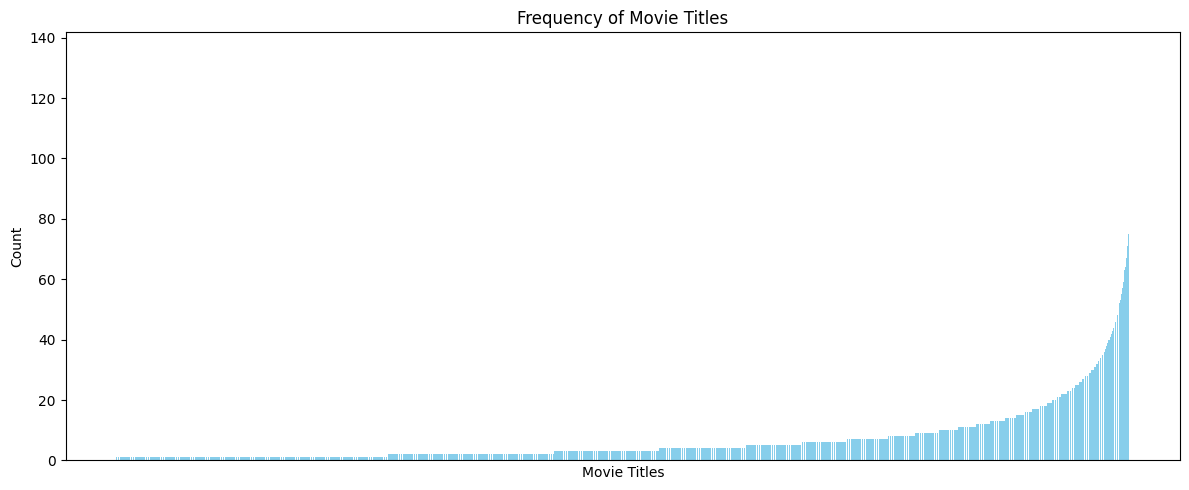

In [ ]:
from re import X
plt.figure(figsize=(12, 5))
bars = plt.bar(
    movie_title_df['movie_title'],
    movie_title_df['count'],
    color='skyblue'
)


plt.xlabel('Movie Titles')
plt.ylabel('Count')
plt.title('Frequency of Movie Titles')
plt.xticks([])
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

### Genres

In [ ]:
trainDf['gt_genre_list'] = trainDf['gt_genre'].str.split(', ')

all_genres = [genre for sublist in trainDf['gt_genre_list'] for genre in sublist]
genre_counts = Counter(all_genres)
genre_df = pd.DataFrame(genre_counts.items(), columns=['genre', 'count'])
genre_df = genre_df.sort_values(by='count', ascending=False).reset_index(drop=True)

In [ ]:
num_unique_genres = len(genre_counts)
print(f"Total unique genre: {num_unique_genres}")

Total unique genre: 23


In [ ]:
genre_df

,genre,count
0,Drama,28560
1,Thriller,16476
2,Comedy,14245
3,Action,13665
4,Adventure,12066
5,Crime,9858
6,Romance,9109
7,Sci-Fi,8094
8,Mystery,7577
9,Fantasy,6688


In [ ]:
percentiles_list = [.2, .4, .6, .8]
genre_df.describe(percentiles=percentiles_list)

,count
count,23.000000
mean,6831.652174
std,6775.236135
min,13.000000
20%,1461.600000
40%,3103.200000
50%,4901.000000
60%,6865.800000
80%,11182.800000
max,28560.000000


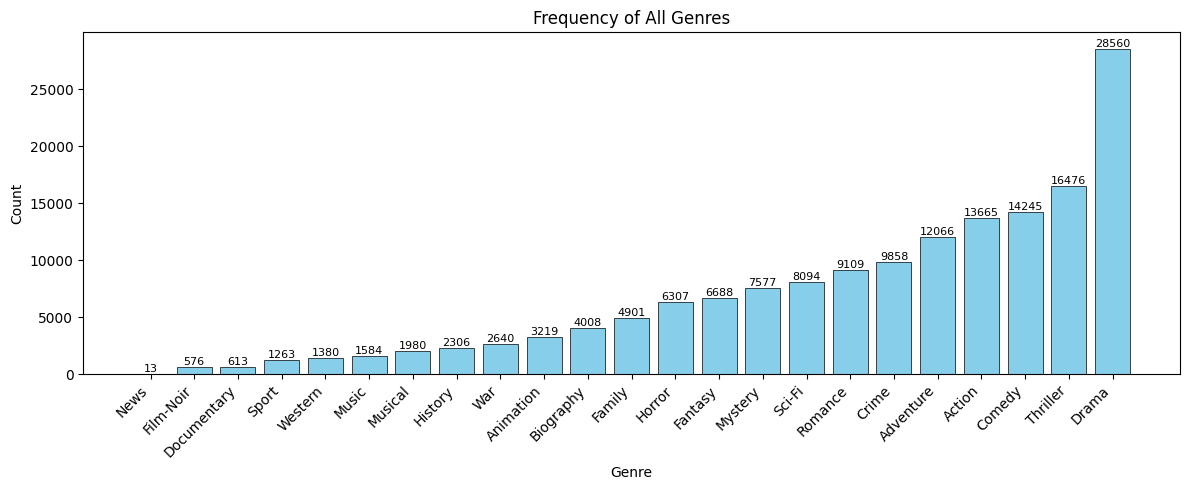

In [ ]:
from re import X
plt.figure(figsize=(12, 5))
bars = plt.bar(
    genre_df['genre'],
    genre_df['count'],
    color='skyblue',
    edgecolor='black',
    linewidth=0.5
)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        str(height),
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Frequency of All Genres')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

# validationDf

In [ ]:
validationDf

,data_id,user_persona,seen_movie_titles,gt_abstract,gt_movie_title,gt_genre,gt_director,gt_cast,dialogue
0,19876,[Like] The film's powerful and prescient portr...,"[Betrayed (1988), Last Tango in Paris (1972), ...",Title: The Manchurian Candidate (1962)\nGenre...,The Manchurian Candidate (1962),"Drama, Thriller",John Frankenheimer,"Frank Sinatra, Laurence Harvey, Janet Leigh",[Seeker: Hi there! I'm in the mood to watch a ...
1,52627,[Like] The movie was a faithful adaptation of ...,"[1984 (1984), Beloved (1998), Breakfast at Ti...","Title: Double Indemnity (1944)\nGenre: Crime, ...",Double Indemnity (1944),"Crime, Drama, Film-Noir, Mystery, Thriller",Billy Wilder,"Fred MacMurray, Barbara Stanwyck, Edward G. Ro...","[, , Seeker: Hi there! I'm in the mood to watc..."
2,48585,[Like]\n- The use of black humor\n- The sound ...,"[Evil Aliens (2005), The Toxic Avenger (1984),...","Title: May (2002)\nGenre: Drama, Horror\nDire...",May (2002),"Drama, Horror",Lucky McKee,"Angela Bettis, Jeremy Sisto, Anna Faris",[Seeker: Hi there! I'm in the mood to watch a ...
3,65463,[Like] \n- Hrithik Roshan's performance in thr...,"[Krrish 3 (2013), Psycho (1960), Godzilla (20...",Title: Zindagi Na Milegi Dobara (2011)\nGenre:...,Zindagi Na Milegi Dobara (2011),"Comedy, Drama, Musical, Romance",Zoya Akhtar,"Hrithik Roshan, Farhan Akhtar, Abhay Deol","[, , Seeker: Hi there! I'm in the mood to watc..."
4,42941,[Like] The movie is perfect for getting into t...,"[The Muppet Christmas Carol (1992), Mary Poppi...",Title: Gnomeo & Juliet (2011)\nGenre: Animatio...,Gnomeo & Juliet (2011),"Animation, Adventure, Comedy, Family, Fantasy,...",Kelly Asbury,"James McAvoy, Emily Blunt, Ashley Jensen",[Seeker: Hi there! I'm in the mood to watch a ...
...,...,...,...,...,...,...,...,...,...
4995,8501,[Like]\n- The trailers for the movie were appe...,"[District 9 (2009), Night of the Living Dead (...",Title: 30 Days of Night (2007)\nGenre: Action...,30 Days of Night (2007),"Action, Horror, Thriller",David Slade,"Josh Hartnett, Melissa George, Danny Huston",[Seeker: Hi there! I'm in the mood to watch a ...
4996,23642,[Like]\n- Skilfully crafted and reminiscent of...,"[Source Code (2011), The Ring (2002), Creatur...","Title: The Uninvited (1944)\nGenre: Fantasy, H...",The Uninvited (1944),"Fantasy, Horror, Mystery, Romance",Lewis Allen,"Ray Milland, Ruth Hussey, Donald Crisp",[Seeker: Hi there! I'm in the mood to watch a ...
4997,72354,[Like]\n- Well-drafted screenplay\n- Interesti...,"[Colette (2018), Murder on the Orient Express ...","Title: Widows (2018)\nGenre: Crime, Drama, Thr...",Widows (2018),"Crime, Drama, Thriller",Steve McQueen,"Viola Davis, Liam Neeson, Jon Bernthal",[Seeker: Hi there! I'm in the mood to watch a ...
4998,31363,[Like] \n- The treatment of the movie like a c...,"[Paranormal Activity (2009), The Adjustment Bu...",Title: How to Train Your Dragon (2010)\nGenre:...,How to Train Your Dragon (2010),"Animation, Action, Adventure, Comedy, Family, ...","Dean DeBlois, Chris Sanders","Jay Baruchel, Gerard Butler, Craig Ferguson",[Seeker: Hi there! I'm in the mood to watch a ...


In [ ]:
validationDf.isnull().sum()


,0
data_id,0
user_persona,0
seen_movie_titles,0
gt_abstract,0
gt_movie_title,0
gt_genre,0
gt_director,0
gt_cast,0
dialogue,0


### Movie (i.e. Seen movies)

In [ ]:
all_movies = [movie for sublist in validationDf['seen_movie_titles'] for movie in sublist]

movie_counts = Counter(all_movies)
num_unique_movies = len(movie_counts)

print(f"Total unique movies: {num_unique_movies}")
movie_df = pd.DataFrame(movie_counts.items(), columns=['movie_title', 'count'])
movie_df = movie_df.sort_values(by='count', ascending=False).reset_index(drop=True)

Total unique movies: 5430


In [ ]:
movie_df

,movie_title,count
0,The Incredibles (2004),32
1,The Great Gatsby (2013),28
2,Baby Driver (2017),26
3,Gone Baby Gone (2007),22
4,The Hateful Eight (2015),19
...,...,...
5425,Great Balls of Fire! (1989),1
5426,Suspect (1987),1
5427,Rise: Blood Hunter (2007),1
5428,The Toxic Avenger (1984),1


In [ ]:
percentiles_list = [.2, .4, .6, .8]
movie_df.describe(percentiles=percentiles_list)

,count
count,5430.000000
mean,2.762431
std,2.636145
min,1.000000
20%,1.000000
40%,1.000000
50%,2.000000
60%,2.000000
80%,4.000000
max,32.000000


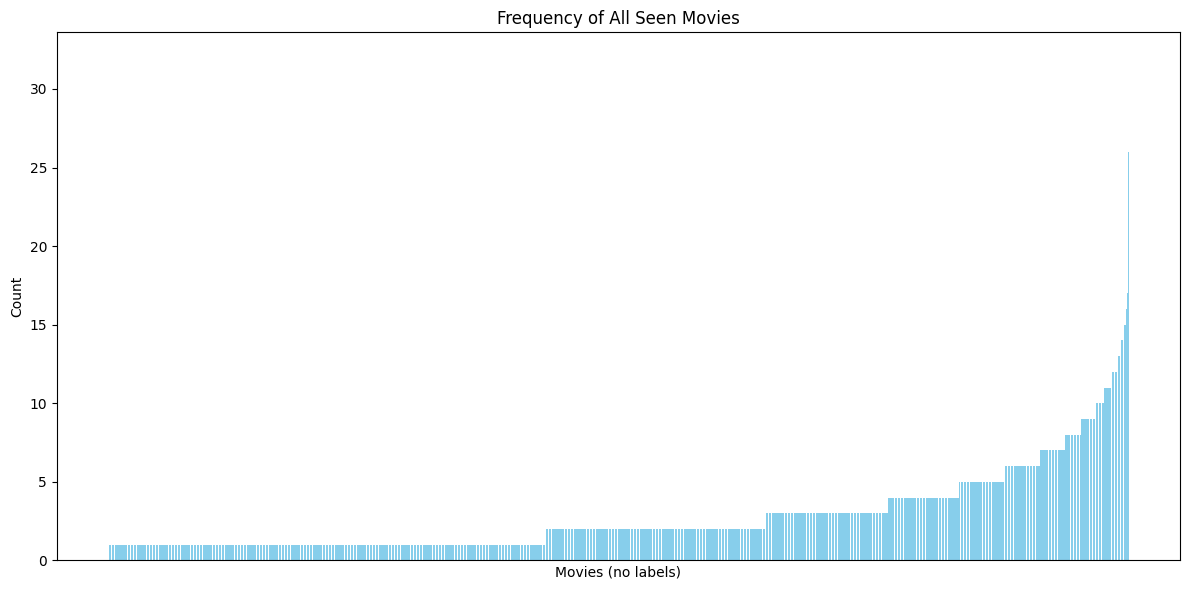

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(movie_df)), movie_df['count'], color='skyblue')
plt.xlabel('Movies (no labels)')
plt.ylabel('Count')
plt.title('Frequency of All Seen Movies')
plt.xticks([])
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

### Movie Titles (i.e. Recommended movie)

In [ ]:
all_movie_titles = [movie_title for movie_title in validationDf['gt_movie_title'] ]
movie_title_counts = Counter(all_movie_titles)
movie_title_df = pd.DataFrame(movie_title_counts.items(), columns=['movie_title', 'count'])
movie_title_df = movie_title_df.sort_values(by='count', ascending=False).reset_index(drop=True)

In [ ]:
movie_title_df

,movie_title,count
0,Baby Driver (2017),13
1,The Prestige (2006),11
2,Die Hard (1988),11
3,No Country for Old Men (2007),11
4,X-Men: Days of Future Past (2014),10
...,...,...
2781,Garfield: The Movie (2004),1
2782,The Great Muppet Caper (1981),1
2783,Bridget Jones's Baby (2016),1
2784,The Penalty (1920),1


In [ ]:
percentiles_list = [.2, .4, .6, .8]
movie_title_df.describe(percentiles=percentiles_list)

,count
count,2786.000000
mean,1.794688
std,1.421123
min,1.000000
20%,1.000000
40%,1.000000
50%,1.000000
60%,1.000000
80%,2.000000
max,13.000000


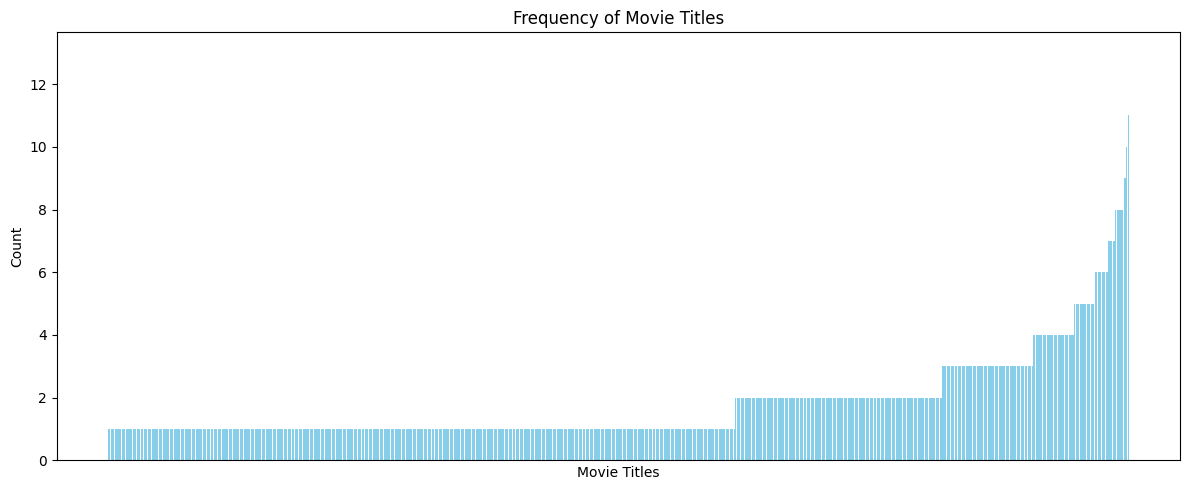

In [ ]:
from re import X
plt.figure(figsize=(12, 5))
bars = plt.bar(
    movie_title_df['movie_title'],
    movie_title_df['count'],
    color='skyblue'
)


plt.xlabel('Movie Titles')
plt.ylabel('Count')
plt.title('Frequency of Movie Titles')
plt.xticks([])
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

### Genres

In [ ]:
validationDf['gt_genre_list'] = validationDf['gt_genre'].str.split(', ')

all_genres = [genre for sublist in validationDf['gt_genre_list'] for genre in sublist]
genre_counts = Counter(all_genres)
genre_df = pd.DataFrame(genre_counts.items(), columns=['genre', 'count'])
genre_df = genre_df.sort_values(by='count', ascending=False).reset_index(drop=True)

In [ ]:
num_unique_genres = len(genre_counts)
print(f"Total unique genre: {num_unique_genres}")

Total unique genre: 23


In [ ]:
genre_df

,genre,count
0,Drama,2915
1,Thriller,1637
2,Comedy,1366
3,Action,1305
4,Adventure,1131
5,Crime,972
6,Romance,928
7,Sci-Fi,804
8,Mystery,761
9,Fantasy,659


In [ ]:
percentiles_list = [.2, .4, .6, .8]
genre_df.describe(percentiles=percentiles_list)

,count
count,23.000000
mean,681.130435
std,674.444034
min,3.000000
20%,144.000000
40%,318.000000
50%,462.000000
60%,679.400000
80%,1067.400000
max,2915.000000


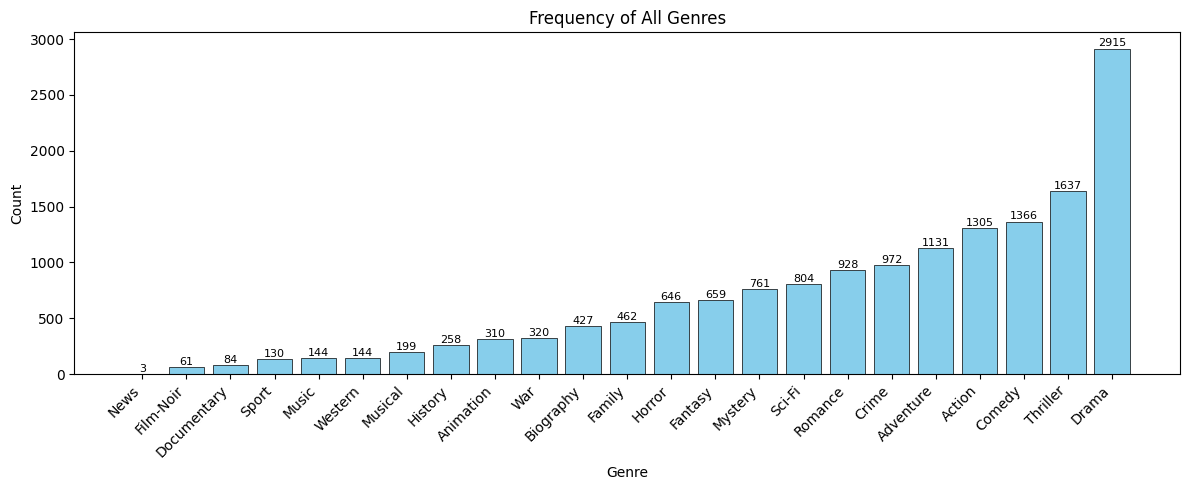

In [ ]:
from re import X
plt.figure(figsize=(12, 5))
bars = plt.bar(
    genre_df['genre'],
    genre_df['count'],
    color='skyblue',
    edgecolor='black',
    linewidth=0.5
)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        str(height),
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Frequency of All Genres')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

# testDf

In [ ]:
testDf

,data_id,user_persona,seen_movie_titles,gt_abstract,gt_movie_title,gt_genre,gt_director,gt_cast,dialogue
0,3590,[Like] \n- The movie delivers exactly what the...,"[Death Race (2008), The Hunt for Red October ...","Title: Die Hard 2 (1990)\nGenre: Action, Thril...",Die Hard 2 (1990),"Action, Thriller",Renny Harlin,"Bruce Willis, Bonnie Bedelia, William Atherton",[Seeker: Hi there! I'm in the mood to watch a ...
1,67175,[Like]\nNone.\n\n[Dislike]\n- The portrayal of...,"[The King of Staten Island (2020), American Hi...","Title: Miracle (2004)\nGenre: Biography, Dram...",Miracle (2004),"Biography, Drama, History, Sport",Gavin O'Connor,"Kurt Russell, Patricia Clarkson, Noah Emmerich",[Seeker: Hi there! I'm in the mood to watch a ...
2,11478,[Like]\n- Entertaining from start to finish\n-...,"[Transporter 2 (2005), The Thieves (2012), The...",Title: All the Money in the World (2017)\nGenr...,All the Money in the World (2017),"Biography, Crime, Drama, Mystery, Thriller",Ridley Scott,"Michelle Williams, Christopher Plummer, Mark W...",[Seeker: Hi there! I'm in the mood to watch a ...
3,53433,[Like] The movie features two of Hitchcock's a...,"[To Catch a Thief (1955), Lifeboat (1944), Mar...",Title: Shadow of a Doubt (1943)\nGenre: Film-N...,Shadow of a Doubt (1943),"Film-Noir, Thriller",Alfred Hitchcock,"Teresa Wright, Joseph Cotten, Macdonald Carey",[Seeker: Hi there! I'm in the mood to watch a ...
4,36172,[Like]\n- Laughter throughout the film\n- Love...,"[Robin Hood: Men in Tights (1993), Bad Moms (2...",Title: Dennis the Menace (1993)\nGenre: Comedy...,Dennis the Menace (1993),"Comedy, Family",Nick Castle,"Walter Matthau, Mason Gamble, Joan Plowright",[Seeker: Hi there! I'm in the mood to watch a ...
...,...,...,...,...,...,...,...,...,...
2272,44164,[Like] \n- The acting in the movie is very goo...,"[The Judge (2014), Entourage (2015), Dawn of...",Title: Kingsman: The Secret Service (2015)\nGe...,Kingsman: The Secret Service (2015),"Action, Adventure, Comedy, Thriller",Matthew Vaughn,"Adrian Quinton, Colin Firth, Mark Strong",[Seeker: Hi there! I'm in the mood to watch a ...
2273,18015,[Like] \n- The director's drastic change in st...,"[An Education (2009), Eastern Promises (2007),...","Title: 127 Hours (2010)\nGenre: Biography, Dra...",127 Hours (2010),"Biography, Drama",Danny Boyle,"James Franco, Kate Mara, Amber Tamblyn",[Seeker: Hi there! I'm in the mood to watch a ...
2274,14844,[Like] None.\n[Dislike] The lack of humor and ...,"[Barney's Version (2011), Hail, Caesar! (2016)...","Title: Robin Hood (2010)\nGenre: Action, Adve...",Robin Hood (2010),"Action, Adventure, Drama, History",Ridley Scott,"Russell Crowe, Cate Blanchett, Max von Sydow",[Seeker: Hi there! I'm in the mood to watch a ...
2275,34501,[Like] \n- The movie was not as cheesy as expe...,"[The Lizzie McGuire Movie (2003), Moonstruck (...","Title: Monsters, Inc. (2001)\nGenre: Animation...","Monsters, Inc. (2001)","Animation, Adventure, Comedy, Family, Fantasy","Pete Docter, David Silverman, Lee Unkrich","John Goodman, Billy Crystal, Mary Gibbs",[Seeker: Hi there! I'm in the mood to watch a ...


In [ ]:
testDf.isnull().sum()

,0
data_id,0
user_persona,0
seen_movie_titles,0
gt_abstract,0
gt_movie_title,0
gt_genre,0
gt_director,0
gt_cast,0
dialogue,0


### Movie (i.e. Seen movies)

In [ ]:
all_movies = [movie for sublist in testDf['seen_movie_titles'] for movie in sublist]

movie_counts = Counter(all_movies)
num_unique_movies = len(movie_counts)

print(f"Total unique movies: {num_unique_movies}")
movie_df = pd.DataFrame(movie_counts.items(), columns=['movie_title', 'count'])
movie_df = movie_df.sort_values(by='count', ascending=False).reset_index(drop=True)

Total unique movies: 3661


In [ ]:
movie_df

,movie_title,count
0,Spider-Man (2002),11
1,The Incredibles (2004),11
2,The Departed (2006),11
3,Man of Steel (2013),11
4,The Wolf of Wall Street (2013),11
...,...,...
3656,Son of the Mask (2005),1
3657,Homeward Bound: The Incredible Journey (1993),1
3658,Driven (2001),1
3659,Bride Wars (2009),1


In [ ]:
percentiles_list = [.2, .4, .6, .8]
movie_df.describe(percentiles=percentiles_list)

,count
count,3661.000000
mean,1.865884
std,1.394285
min,1.000000
20%,1.000000
40%,1.000000
50%,1.000000
60%,2.000000
80%,3.000000
max,11.000000


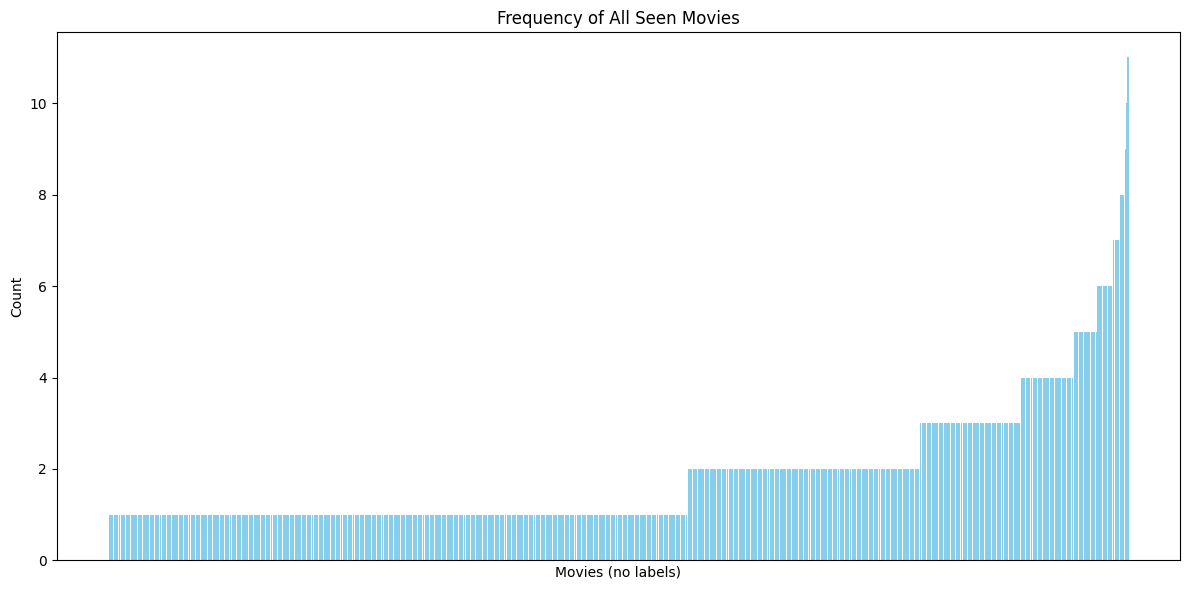

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(range(len(movie_df)), movie_df['count'], color='skyblue')
plt.xlabel('Movies (no labels)')
plt.ylabel('Count')
plt.title('Frequency of All Seen Movies')
plt.xticks([])
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

### Movie Titles (i.e. Recommended movie)

In [ ]:
all_movie_titles = [movie_title for movie_title in testDf['gt_movie_title'] ]
movie_title_counts = Counter(all_movie_titles)
movie_title_df = pd.DataFrame(movie_title_counts.items(), columns=['movie_title', 'count'])
movie_title_df = movie_title_df.sort_values(by='count', ascending=False).reset_index(drop=True)

In [ ]:
movie_title_df

,movie_title,count
0,Aliens (1986),8
1,Deadpool (2016),7
2,The Silence of the Lambs (1991),6
3,Batman Begins (2005),6
4,Goldfinger (1964),6
...,...,...
1597,Love and Death (1975),1
1598,Shakespeare in Love (1998),1
1599,Manhunter (1986),1
1600,Coming to America (1988),1


In [ ]:
percentiles_list = [.2, .4, .6, .8]
movie_title_df.describe(percentiles=percentiles_list)

,count
count,1602.000000
mean,1.421348
std,0.849216
min,1.000000
20%,1.000000
40%,1.000000
50%,1.000000
60%,1.000000
80%,2.000000
max,8.000000


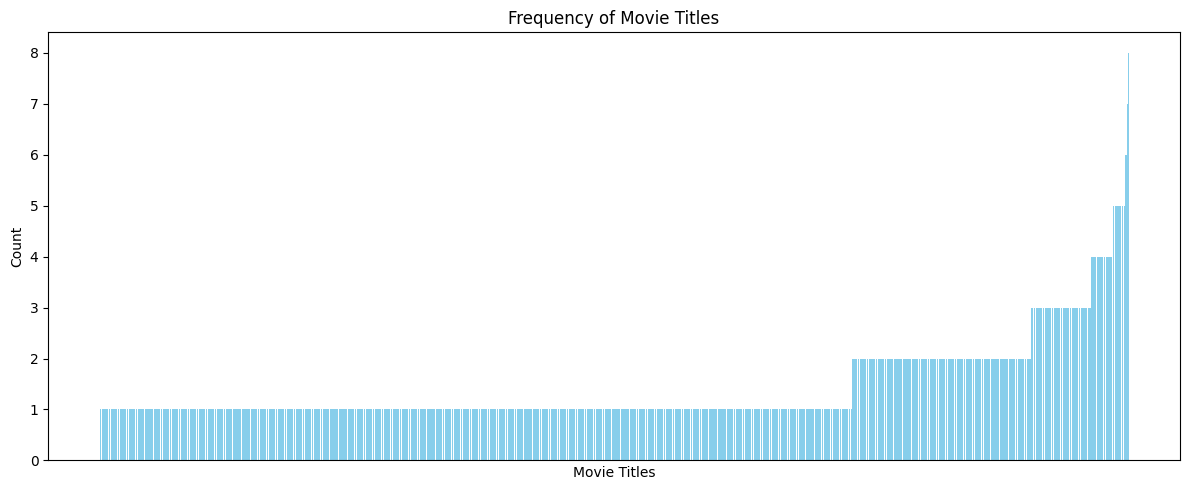

In [ ]:
from re import X
plt.figure(figsize=(12, 5))
bars = plt.bar(
    movie_title_df['movie_title'],
    movie_title_df['count'],
    color='skyblue'
)


plt.xlabel('Movie Titles')
plt.ylabel('Count')
plt.title('Frequency of Movie Titles')
plt.xticks([])
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

### Genres

In [ ]:
testDf['gt_genre_list'] = testDf['gt_genre'].str.split(', ')

all_genres = [genre for sublist in testDf['gt_genre_list'] for genre in sublist]
genre_counts = Counter(all_genres)
genre_df = pd.DataFrame(genre_counts.items(), columns=['genre', 'count'])
genre_df = genre_df.sort_values(by='count', ascending=False).reset_index(drop=True)

In [ ]:
num_unique_genres = len(genre_counts)
print(f"Total unique genre: {num_unique_genres}")

Total unique genre: 22


In [ ]:
genre_df

,genre,count
0,Drama,1354
1,Thriller,765
2,Comedy,682
3,Action,597
4,Adventure,518
5,Crime,456
6,Romance,395
7,Sci-Fi,350
8,Mystery,344
9,Horror,296


In [ ]:
percentiles_list = [.2, .4, .6, .8]
genre_df.describe(percentiles=percentiles_list)

,count
count,22.000000
mean,326.363636
std,315.902418
min,25.000000
20%,77.600000
40%,164.000000
50%,246.500000
60%,324.800000
80%,505.600000
max,1354.000000


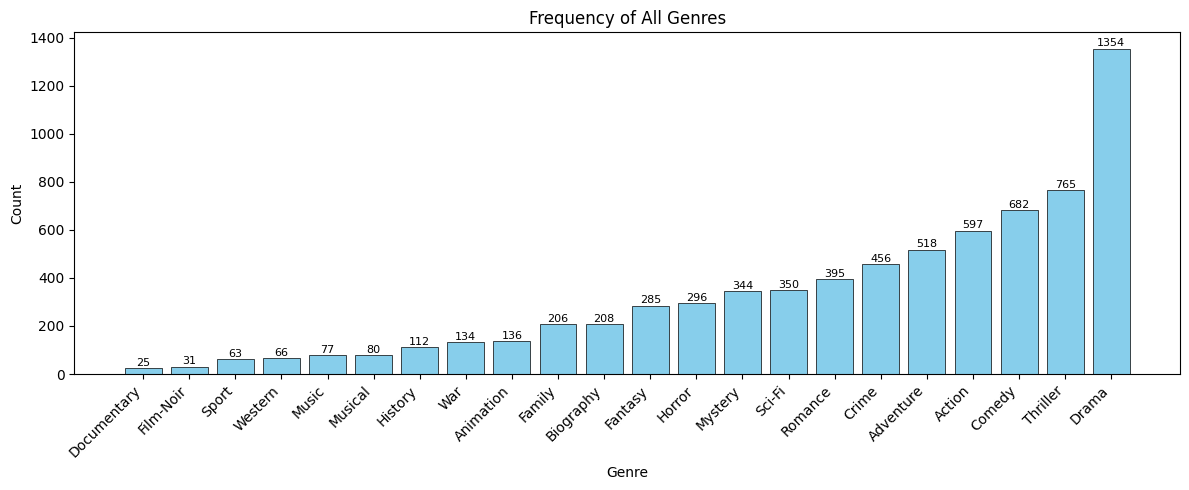

In [ ]:
from re import X
plt.figure(figsize=(12, 5))
bars = plt.bar(
    genre_df['genre'],
    genre_df['count'],
    color='skyblue',
    edgecolor='black',
    linewidth=0.5
)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        str(height),
        ha='center',
        va='bottom',
        fontsize=8
    )

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Frequency of All Genres')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()